In [38]:

# Use this cell to regroup all your imports
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from prophet import Prophet
from neuralprophet import NeuralProphet, set_log_level

In [39]:
data_folder = pathlib.Path().absolute().parent.joinpath('propertywagontimeseries','raw_data')
data_folder

PosixPath('/Users/Ben/code/haurey/propertywagontest/property-wagon/propertywagontimeseries/raw_data')

In [65]:
town = 'BEDOK'
flat = "EXECUTIVE"
df = pd.read_csv(f'/Users/Ben/code/johnleesenghee/property-wagon/propertywagontimeseries/processed_data/{town}{flat}.csv')

# df['Resale_price'] = df['y']
# df['Date'] = df['ds']

# df.drop(columns=['ds','y'],inplace=True)

df.rename(columns={'ds':'Date','y':'Resale_price'},inplace=True)

In [66]:
import plotly.express as px

fig = px.line(df, x='Date', y='Resale_price',
        line_shape="spline", render_mode="svg")
fig.show()

In [65]:
data_folder = pathlib.Path().absolute().parent.joinpath('propertywagontimeseries','raw_data')
data_path = data_folder.joinpath('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv').absolute()
data_path2 = data_folder.joinpath('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv').absolute()
data_path3 = data_folder.joinpath('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv').absolute()
data_path4 = data_folder.joinpath('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv').absolute()


df = pd.read_csv(data_path)
df2 = pd.read_csv(data_path2)
df3 = pd.read_csv(data_path3)
df4 = pd.read_csv(data_path4)
#ALL DATA

In [66]:
df4 = df4.sort_values(by=['month'],ascending=True)
df3 = df3.sort_values(by=['month'],ascending=True)
df2 = df2.sort_values(by=['month'],ascending=True)
df = df.sort_values(by=['month'],ascending=False)
df = pd.concat([df,df2],ignore_index=True,sort=False)
df = pd.concat([df,df3],ignore_index=True,sort=False)
df = pd.concat([df,df4],ignore_index=True,sort=False)
df = df.sort_values(by=['month'],ascending=True)


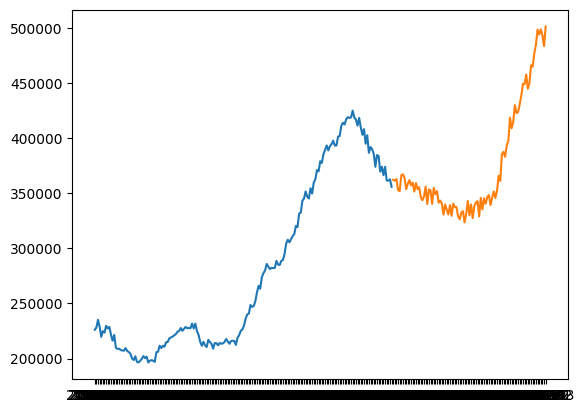

In [67]:
df = df[(df['town']=='WOODLANDS') & (df['flat_type']=='4 ROOM')]
df = df.groupby(by='month').mean()
df.drop(columns=['floor_area_sqm','lease_commence_date'],inplace=True)


In [89]:
df = df.reset_index()
df = df.rename(columns={'month': 'ds', 'resale_price':'y'})
df.tail()

,index,ds,y
274,274,2022-11,493970.160920
275,275,2022-12,498603.534884
276,276,2023-01,493153.831776
277,277,2023-02,483411.938462
278,278,2023-03,501216.000000


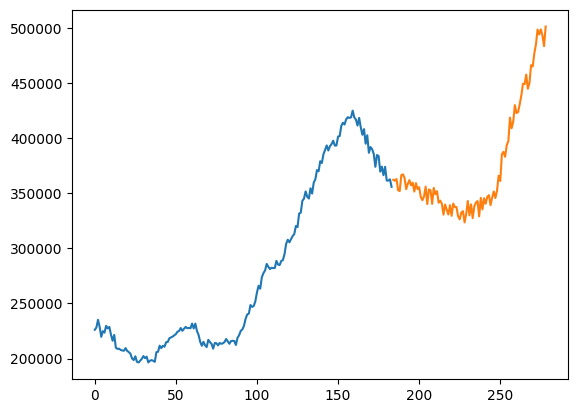

In [90]:
train = df[:184]
test = df[184:]
plt.plot(train['y'])
plt.plot(test['y'])

In [162]:
model = Prophet(interval_width=0.95,changepoint_prior_scale=0.001, seasonality_prior_scale= 10.0)

model.fit(train)

20:51:50 - cmdstanpy - INFO - Chain [1] start processing
20:51:50 - cmdstanpy - INFO - Chain [1] done processing
20:51:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
20:51:50 - cmdstanpy - INFO - Chain [1] start processing
20:51:50 - cmdstanpy - INFO - Chain [1] done processing


In [163]:
forecast_test = model.predict(test)
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-01,402880.048540,336123.954393,465881.817236,402880.048532,402880.048549,-620.594780,-620.594780,-620.594780,-620.594780,-620.594780,-620.594780,0.0,0.0,0.0,402259.453761
1,2015-06-01,404211.996504,333125.501007,465567.080768,404211.996472,404211.996540,-1616.127212,-1616.127212,-1616.127212,-1616.127212,-1616.127212,-1616.127212,0.0,0.0,0.0,402595.869292
2,2015-07-01,405500.978403,341153.092023,472688.901417,405500.978336,405500.978495,-310.035836,-310.035836,-310.035836,-310.035836,-310.035836,-310.035836,0.0,0.0,0.0,405190.942568
3,2015-08-01,406832.926367,342198.981787,468650.308689,406832.926249,406832.926500,-928.265754,-928.265754,-928.265754,-928.265754,-928.265754,-928.265754,0.0,0.0,0.0,405904.660613
4,2015-09-01,408164.874330,342323.994392,470066.405796,408164.874167,408164.874516,-3179.145234,-3179.145234,-3179.145234,-3179.145234,-3179.145234,-3179.145234,0.0,0.0,0.0,404985.729096


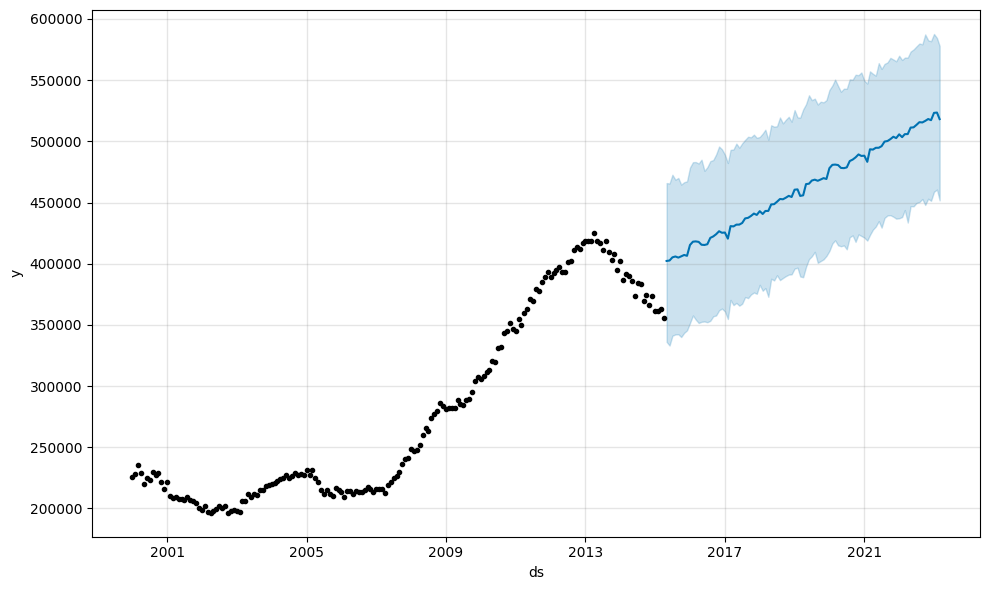

In [164]:
model.plot(forecast_test);

In [165]:
len(test)

95

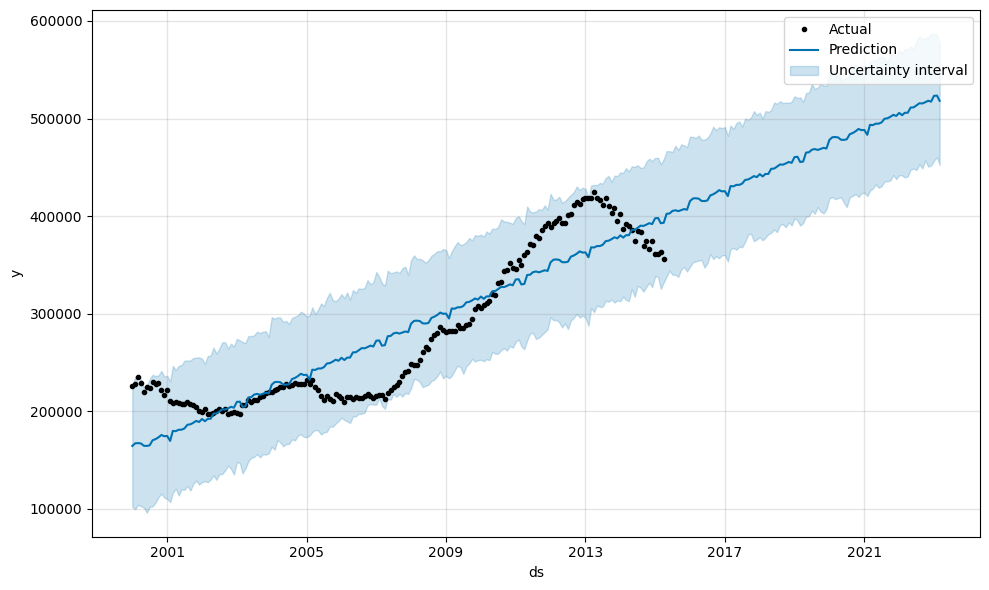

In [166]:
# Predict the next 48 datapoints
future = model.make_future_dataframe(periods=95, freq='MS')
forecast_future = model.predict(future)
forecast_future.tail()
model.plot(forecast_future);
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [167]:
forecast_future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,162313.059955,101649.955555,225263.768069,162313.059955,162313.059955,1883.402748,1883.402748,1883.402748,1883.402748,1883.402748,1883.402748,0.0,0.0,0.0,164196.462703
1,2000-02-01,163645.007918,99266.486753,235257.220612,163645.007918,163645.007918,3254.447730,3254.447730,3254.447730,3254.447730,3254.447730,3254.447730,0.0,0.0,0.0,166899.455649
2,2000-03-01,164891.023755,103897.143738,228195.299092,164891.023755,164891.023755,2238.955797,2238.955797,2238.955797,2238.955797,2238.955797,2238.955797,0.0,0.0,0.0,167129.979552
3,2000-04-01,166222.971718,102302.872885,232686.285685,166222.971718,166222.971718,505.043676,505.043676,505.043676,505.043676,505.043676,505.043676,0.0,0.0,0.0,166728.015394
4,2000-05-01,167511.953618,101251.491459,224398.162525,167511.953618,167511.953618,-3118.818906,-3118.818906,-3118.818906,-3118.818906,-3118.818906,-3118.818906,0.0,0.0,0.0,164393.134712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2022-11-01,520650.028130,450697.980817,583086.068358,520650.015463,520650.040015,-2440.863552,-2440.863552,-2440.863552,-2440.863552,-2440.863552,-2440.863552,0.0,0.0,0.0,518209.164578
275,2022-12-01,521939.010030,451711.933009,586690.757523,521938.997146,521939.022056,-4658.940217,-4658.940217,-4658.940217,-4658.940217,-4658.940217,-4658.940217,0.0,0.0,0.0,517280.069813
276,2023-01-01,523270.957993,456792.467354,586721.126050,523270.944893,523270.970160,-35.299942,-35.299942,-35.299942,-35.299942,-35.299942,-35.299942,0.0,0.0,0.0,523235.658051
277,2023-02-01,524602.905956,460264.361178,585577.808856,524602.892608,524602.918265,-1098.053619,-1098.053619,-1098.053619,-1098.053619,-1098.053619,-1098.053619,0.0,0.0,0.0,523504.852338


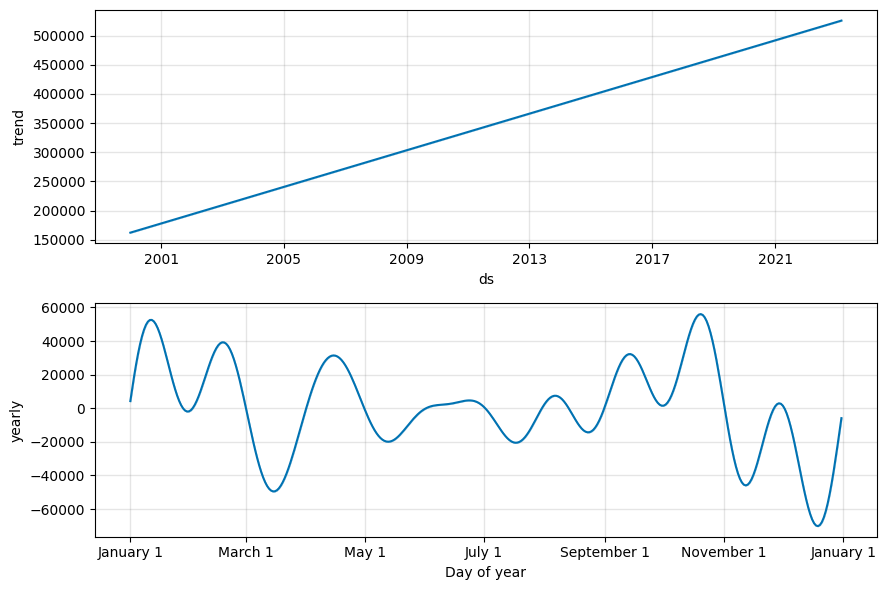

In [168]:
fig = m.plot_components(forecast_future)

In [169]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast_future.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 93815


In [170]:
horizon = '1800 days'

# itraining period (optional. default is 3x of horizon)
initial = str(365 * 5) + ' days'  

# spacing between cutoff dates (optional. default is 0.5x of horizon)
period = '365 days' 
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon, parallel='processes')

20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:18 - cmdstanpy - INFO - Chain [1] done processing
20:52:18 - cmdstanpy - INFO - Chain [1] done processing
20:52:18 - cmdstanpy - INFO - Chain [1] done processing
20:52:18 - cmdstanpy - INFO - Chain [1] done processing
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] done processing
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain 

In [171]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-04-01,232006.239507,230441.057620,233736.433960,225019.966102,2005-03-30
1,2005-05-01,232582.782163,229528.701501,236015.217349,221476.525424,2005-03-30
2,2005-06-01,234005.463729,227767.019472,241189.611340,215252.857143,2005-03-30
3,2005-07-01,233559.294664,224314.193413,244530.918969,211610.588235,2005-03-30
4,2005-08-01,235222.188081,221290.215783,251380.690699,215200.942857,2005-03-30
...,...,...,...,...,...,...
835,2022-11-01,292523.979868,137324.175259,442818.717103,493970.160920,2018-03-27
836,2022-12-01,290159.648699,132287.501182,443726.099856,498603.534884,2018-03-27
837,2023-01-01,287537.198026,124311.699801,443961.850291,493153.831776,2018-03-27
838,2023-02-01,285896.139114,119685.603089,449258.592852,483411.938462,2018-03-27


In [172]:
from prophet.diagnostics import cross_validation, performance_metrics 

# performance metrics  
df_metrics = performance_metrics(df_cv)  # can define window size, e.g. rolling_window=365
df_metrics


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,158 days,3.459863e+08,18600.706964,15308.737277,0.048367,0.042581,0.047876,0.107143
1,185 days,3.622545e+08,19032.983327,15892.849018,0.051018,0.046068,0.050548,0.107143
2,186 days,3.762946e+08,19398.313383,16413.844120,0.052613,0.049968,0.052179,0.095238
3,187 days,4.251217e+08,20618.480114,17149.725399,0.054468,0.049968,0.053884,0.095238
4,188 days,4.242068e+08,20596.281458,17131.027766,0.054450,0.049968,0.053859,0.095238
...,...,...,...,...,...,...,...,...
224,1772 days,2.581615e+10,160674.056454,142224.191651,0.382328,0.403659,0.388498,0.595238
225,1797 days,2.588071e+10,160874.830080,142304.851860,0.382780,0.403659,0.389546,0.595238
226,1798 days,2.584343e+10,160758.912033,142536.009898,0.382598,0.403659,0.389544,0.604167
227,1799 days,2.670139e+10,163405.611571,145580.658202,0.391530,0.407709,0.395710,0.610119


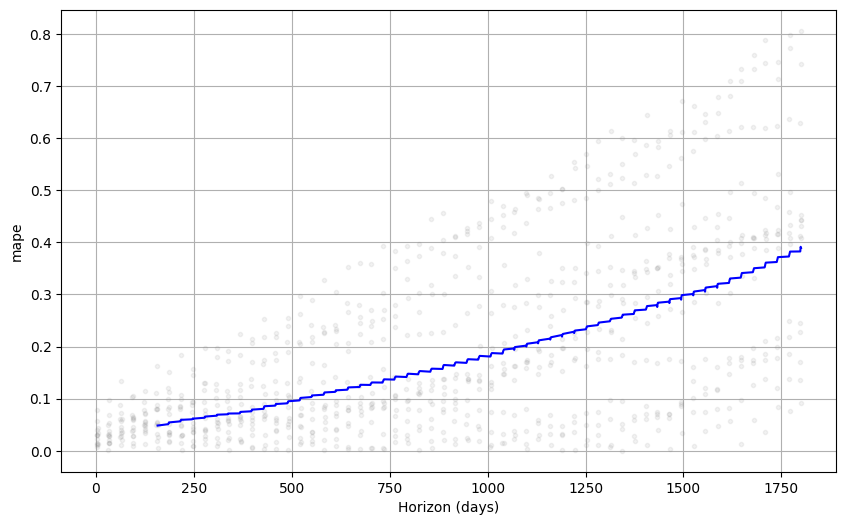

In [173]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [158]:
import itertools
import numpy as np
import pandas as pd

cutoffs = [pd.to_datetime('2015-04-01')]
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, initial=initial, period=period, horizon='1800 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] done processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] done processing
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
20:49:50 - cmdstanpy - INFO - Chain [1] start processing
20

    changepoint_prior_scale  seasonality_prior_scale           rmse
0                     0.001                     0.01   86239.286854
1                     0.001                     0.10   85762.054069
2                     0.001                     1.00   85920.253196
3                     0.001                    10.00   85683.162613
4                     0.010                     0.01  107048.162150
5                     0.010                     0.10  107593.420787
6                     0.010                     1.00  107776.071018
7                     0.010                    10.00  107707.107695
8                     0.100                     0.01   95850.618179
9                     0.100                     0.10   95785.869357
10                    0.100                     1.00   95950.666409
11                    0.100                    10.00   96085.836392
12                    0.500                     0.01   94355.840678
13                    0.500                     

In [159]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}
